In [1]:
!pip install kaggle
!kaggle datasets list


Defaulting to user installation because normal site-packages is not writeable
ref                                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                            Student Performance Factors                          94KB  2024-09-02 10:53:57          13690        283  1.0              
owm4096/laptop-prices                                              Laptop Prices                                        25KB  2024-09-09 12:43:01           3706         69  1.0              
muhammadehsan02/global-football-results-18722024                   Global Football Results: (1872–2024)                  1MB  2024-09-04 10:00:52           12

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
! kaggle datasets download -d ninadaithal/imagesoasis

Dataset URL: https://www.kaggle.com/datasets/ninadaithal/imagesoasis
License(s): apache-2.0
imagesoasis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# ! unzip -q "imagesoasis.zip" -d mri-data
import zipfile
import os

# Define the path to the zip file and the destination directory
zip_file_path = 'imagesoasis.zip'  # or provide the full path
destination_dir = 'mri-data'

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_dir)

print(f'Unzipped {zip_file_path} to {destination_dir}')


Unzipped imagesoasis.zip to mri-data


In [5]:
print("hello")

hello


In [6]:
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn  as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


import random
# deeplearning libraries
import cv2
# from google.colab.patches import cv2_imshow
from PIL import Image
# cv2 and pillow used for image preprocessing tasks


# tensorflow libraries
import tensorflow
# tf.random.set_seed(3)
# from tensorflow import keras
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten, Dropout,BatchNormalization
from tensorflow.keras.models import Sequential

from tensorflow.math import confusion_matrix
from tensorflow.keras.optimizers import Adamax

In [7]:
data_dir = 'D:\jupyter projects\mri-data\Data'

<>:1: SyntaxWarning: invalid escape sequence '\j'
<>:1: SyntaxWarning: invalid escape sequence '\j'
C:\Users\Personal\AppData\Local\Temp\ipykernel_17280\1215325776.py:1: SyntaxWarning: invalid escape sequence '\j'
  data_dir = 'D:\jupyter projects\mri-data\Data'


image example :  Moderate Dementia


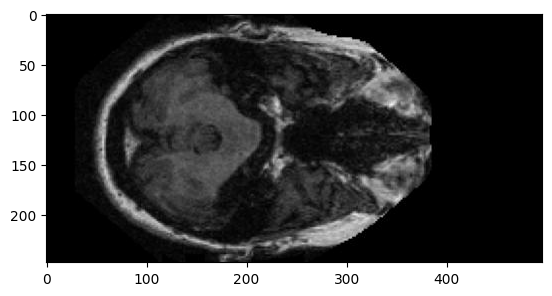

In [8]:
labels = os.listdir(data_dir)
random_label = np.random.choice(labels)
random_img = np.random.choice((os.listdir(os.path.join(data_dir, random_label))))
img_path = os.path.join(data_dir, random_label, random_img)
img = plt.imread(img_path)

print("image example : " ,random_label )
plt.imshow(img)
plt.show()

In [9]:
print(type(img))
print(img.shape)
print(type(labels))
print(labels)

<class 'numpy.ndarray'>
(248, 496, 3)
<class 'list'>
['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']


In [10]:
for label in labels:
  print(label , " : " , len(os.listdir(os.path.join(data_dir, label))) )

Mild Dementia  :  5002
Moderate Dementia  :  488
Non Demented  :  67222
Very mild Dementia  :  13725


In [11]:
non_demented =[]
moderate_dementia=[]
mild_dementia=[]
very_mild_dementia=[]

for dirname, _, filenames in os.walk(r'D:\jupyter projects\mri-data\Data\Non Demented'):
    for filename in filenames:
        non_demented.append(os.path.join(dirname, filename))


for dirname, _, filenames in os.walk(r'D:\jupyter projects\mri-data\Data\Moderate Dementia'):
    for filename in filenames:
        moderate_dementia.append(os.path.join(dirname, filename))



for dirname, _, filenames in os.walk(r'D:\jupyter projects\mri-data\Data\Mild Dementia'):
    for filename in filenames:
        mild_dementia.append(os.path.join(dirname, filename))



for dirname, _, filenames in os.walk(r'D:\jupyter projects\mri-data\Data\Very mild Dementia'):
    for filename in filenames:
        very_mild_dementia.append(os.path.join(dirname, filename))

In [12]:
print(len(non_demented))
print(len(moderate_dementia))
print(len( very_mild_dementia))
print(len(mild_dementia))

67222
488
13725
5002


In [13]:
very_mild_dementia=very_mild_dementia[0:500]
mild_dementia = mild_dementia[0:500]
non_demented = non_demented[0:500]

In [14]:
print(len(non_demented))
print(len(moderate_dementia))
print(len( very_mild_dementia))
print(len(mild_dementia))

500
488
500
500


In [15]:
encoder = OneHotEncoder()
encoder.fit([[0] , [1], [2], [3]])

OneHotEncoder()

In [16]:
img = plt.imread(non_demented[0])
print(type(img))
print(img.shape)
img = cv2.resize(img , (128,128))
print(img.shape)

dataset= []
label =[]


# for Non_demented
for i in non_demented :
  img = plt.imread(i)

  img_resize = cv2.resize(img , (128,128))

  img = img_resize
  dataset.append(img)
  label.append( encoder.transform([[0]]).toarray() )


# for moderate_dementia


for i in moderate_dementia :
  img = plt.imread(i)

  img_resize = cv2.resize(img , (128,128))

  img = img_resize
  dataset.append(img)
  label.append( encoder.transform([[1]]).toarray()  )

print(label[0])

# for mild_dementia


for i in mild_dementia :
  img = plt.imread(i)

  img_resize = cv2.resize(img , (128,128))

  img = img_resize
  dataset.append(img)
  label.append( encoder.transform([[2]]).toarray()  )

print(label[502])


# for very_mild_dementia


for i in very_mild_dementia :
  img = plt.imread(i)

  img_resize = cv2.resize(img , (128,128))

  img = img_resize
  dataset.append(img)
  label.append( encoder.transform([[3]]).toarray()  )

<class 'numpy.ndarray'>
(248, 496, 3)
(128, 128, 3)
[[1. 0. 0. 0.]]
[[0. 1. 0. 0.]]


In [17]:
X= np.array(dataset)
print(X.shape)
Y=np.array(label)
print(Y.shape)
print(X.shape[0])
Y = Y.reshape(X.shape[0] , 4)
print(Y.shape)

(1988, 128, 128, 3)
(1988, 1, 4)
1988
(1988, 4)


In [18]:
print(Y)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


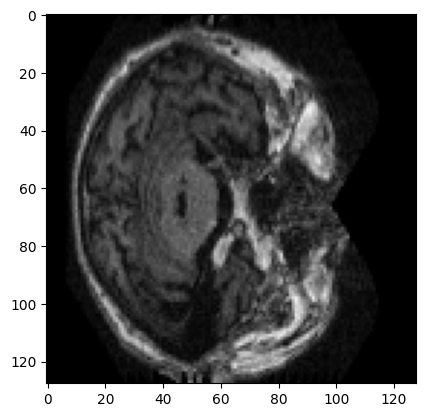

actual label is :  [0. 1. 0. 0.]


In [19]:
random_ind = np.random.randint(0, X.shape[0])
image = X[random_ind]
label = Y[random_ind]
plt.imshow(image , cmap='gray')
plt.show()
print("actual label is : ", label)

In [20]:
array = []
array = [np.argmax(i) for i in Y]
Y = np.array(array)
print(Y)

[0 0 0 ... 3 3 3]


In [21]:
X= X/255

In [22]:
X_train, X_test ,Y_train, Y_test = train_test_split(X , Y ,test_size =0.2 , random_state=2, stratify=Y)

In [23]:
print(type(X_train))
X_train = np.array(X_train)
print(type(X_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [24]:
print(X_train.shape[0] , Y_train.shape[0])

1590 1590


In [25]:
# print(X_test)
print(X_test.shape)

(398, 128, 128, 3)


In [26]:
print(Y_test)
print(Y_test.shape)

[1 0 3 2 3 0 0 3 0 2 1 0 1 0 3 0 1 0 1 0 1 2 1 1 3 1 3 2 0 0 0 3 2 2 3 3 2
 0 1 2 2 1 3 2 2 2 0 0 2 0 0 0 2 1 3 0 1 1 0 0 0 2 0 1 1 1 3 1 0 3 0 0 0 3
 2 1 0 2 0 3 0 3 2 1 1 0 3 0 1 3 3 1 1 0 0 0 3 1 3 3 2 2 2 2 2 2 3 1 0 3 1
 1 0 3 3 2 0 1 0 2 0 2 3 2 3 3 1 0 1 2 0 2 1 1 1 1 1 2 1 3 3 1 2 3 2 1 3 1
 2 3 3 3 3 0 0 0 2 0 2 3 0 2 0 2 3 3 1 1 2 0 3 1 2 1 1 2 0 2 0 0 2 2 2 0 3
 3 0 2 3 3 1 2 1 0 2 1 3 1 3 1 1 0 3 1 1 2 2 2 3 1 0 2 3 2 1 2 3 1 2 2 1 3
 0 3 0 2 1 0 2 1 3 0 3 2 0 1 0 0 3 0 0 3 3 3 2 3 2 2 1 3 1 3 3 3 2 3 2 1 3
 2 0 0 0 2 1 0 1 1 2 3 2 3 0 3 0 1 2 3 2 2 1 1 2 0 2 0 2 1 0 0 1 2 1 1 3 3
 1 3 3 1 1 1 1 0 2 2 2 1 0 2 2 0 1 0 2 0 0 3 1 3 1 3 0 1 1 2 2 2 2 0 3 2 3
 0 3 2 0 0 2 1 2 1 3 1 3 3 1 0 3 3 3 1 2 1 3 0 0 0 2 0 1 0 3 3 0 0 3 2 1 3
 3 0 2 2 1 0 3 1 2 1 0 3 0 1 3 3 0 2 2 2 2 3 3 2 3 3 1 1]
(398,)


In [27]:
#  Building the Neural Network
model = Sequential([
    Conv2D(32 , (3,3) , activation = 'relu' , input_shape=(128,128 ,3)) ,
    MaxPooling2D((2,2)) ,



    Conv2D(32 , (3,3) , activation = 'relu' ) ,
    MaxPooling2D((2,2)) ,



    # Conv2D(32 , (3,3) , activation = 'relu' ) ,
    # MaxPooling2D((2,2)) ,


    Flatten() ,

    Dense(300 ,activation='relu') ,


    # Dense(300 ,activation='relu') ,

    Dense(4, activation ='softmax')


])
model.summary()

C:\Users\Personal\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │       8,640,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,651,648 (33.00 MB)

 Trainable params: 8,651,648 (33.00 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(
    optimizer = 'adam' ,
    loss = 'sparse_categorical_crossentropy' ,
    metrics= ['accuracy']
)

In [29]:
# X_train = np.array(X_train)
# Y_train = np.array(Y_train)

In [30]:
model.fit(X_train,Y_train,epochs=30 ,  validation_split=0.2)


Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - accuracy: 0.5203 - loss: 1.5095 - val_accuracy: 0.9780 - val_loss: 0.0734
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 0.9920 - loss: 0.0418 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 5.5642e-04
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 1.0000 - loss: 3.6129e-04 - val_accuracy: 1.0000 - val_loss: 3.0325e-04
Epoch 5/30
38/40 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 1.0000 - loss: 2.3470e-04

KeyboardInterrupt: 

In [ ]:
loss , accuracy = model.evaluate(X_test , Y_test)
print("test data accuracy is nearly : " , accuracy*100  , "%")

In [ ]:
Y_predict = model.predict(X_test)
print(Y_predict.shape)
Y_predict[0]
Y_predict.shape
print(type(Y_predict))
Y_pred_labels = [np.argmax(i) for i in Y_predict]
print(Y_pred_labels)

In [ ]:
con_mat= confusion_matrix(Y_test , Y_pred_labels)
print(con_mat)

plt.figure(figsize=(5,5))
sns.heatmap(con_mat ,annot=True ,  fmt ='d' , cmap= 'Blues')
plt.ylabel('True labels')
plt.xlabel('Predicted_labels')

In [ ]:
# Building a Predictive system

random_ind = np.random.randint(0, X_test.shape[0])
image = X_test[random_ind]
label = Y_test[random_ind]
print(label)
plt.imshow(image , cmap='gray')
plt.show()


if(label==0):
  label = "non_demented"
if(label==1):
  label = "moderate_dementia"
if(label==2):
  label = "mild_dementia"
if(label==3):
  label ="very_mild_dementia"
print("actual label is : ", label)


image.shape
# image_reshaped = np.reshape(image , [1,3,128,128])
predicted_label = model.predict(X_test[random_ind , :].reshape(1,128,128,3))
predicted_label = np.argmax(predicted_label)
if(predicted_label==0):
  predicted_label = "non_demented"
if(predicted_label==1):
  predicted_label = "moderate_dementia"
if(predicted_label==2):
  predicted_label = "mild_dementia"
if(predicted_label==3):
  predicted_label ="very_mild_dementia"

print("predicted_label is : " ,predicted_label )

In [ ]:
print(Y_train.shape , Y_test.shape)

In [ ]:
# Save the entire model to a file
model.save('alzheimer_cnn_model.h5')

print("Model saved to alzheimer_cnn_model.h5")


In [32]:
#  From now on I just need to run from this cell onwards 

from tensorflow.keras.models import load_model

# Load the saved model
saved_model = load_model('alzheimer_cnn_model.h5')

print("Model loaded successfully!")


Model loaded successfully!


In [33]:
loss , accuracy = saved_model.evaluate(X_test , Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 1.0000 - loss: 2.7611e-06


0


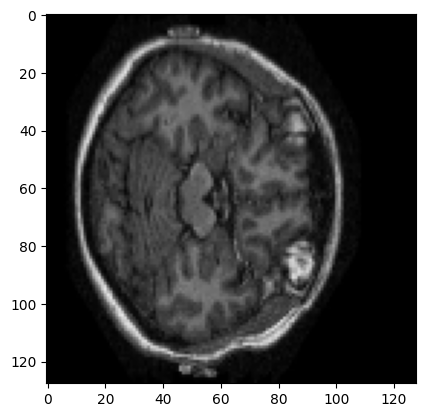

actual label is :  non_demented
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
predicted_label is :  non_demented


In [34]:
# Building a Predictive system

random_ind = np.random.randint(0, X_test.shape[0])
image = X[random_ind]
label = Y[random_ind]
print(label)
plt.imshow(image , cmap='gray')
plt.show()


if(label==0):
  label = "non_demented"
if(label==1):
  label = "moderate_dementia"
if(label==2):
  label = "mild_dementia"
if(label==3):
  label ="very_mild_dementia"
print("actual label is : ", label)


image.shape
# image_reshaped = np.reshape(image , [1,3,128,128])
predicted_label = saved_model.predict(X[random_ind , :].reshape(1,128,128,3))
predicted_label = np.argmax(predicted_label)
if(predicted_label==0):
  predicted_label = "non_demented"
if(predicted_label==1):
  predicted_label = "moderate_dementia"
if(predicted_label==2):
  predicted_label = "mild_dementia"
if(predicted_label==3):
  predicted_label ="very_mild_dementia"

print("predicted_label is : " ,predicted_label )